<a href="https://colab.research.google.com/github/eugenie-kim012/ds4-quests/blob/main/D%2B54_DL_MINI_Projects_(1st).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 보스턴 주택 가격 예측 (회귀)

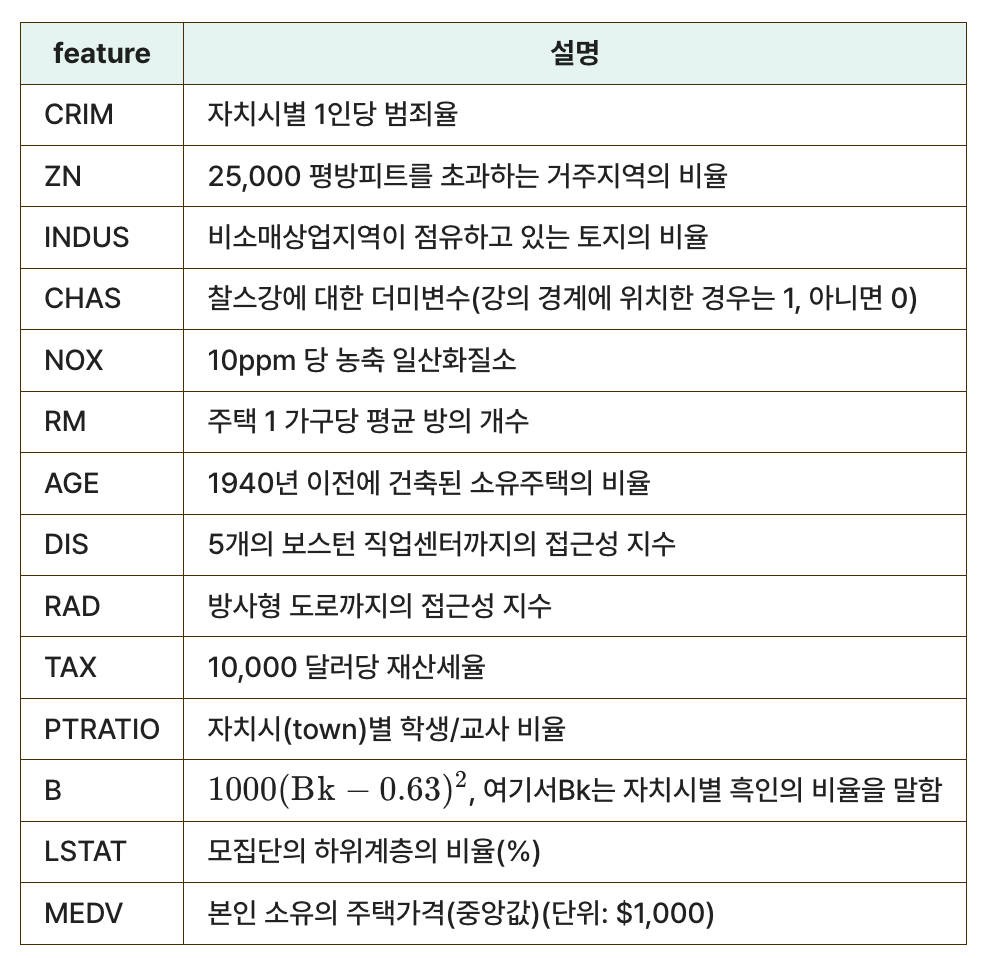

##1.1 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

##1.2. 모델 구성 및 컴파일
* 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [ ]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(13,)))              # 입력층: 특성 13개 (Boston housing)
model.add(layers.Dense(64, activation='relu'))    # 은닉층 1
model.add(layers.Dense(64, activation='relu'))    # 은닉층 2
model.add(layers.Dense(1))                        # 출력층: 회귀이므로 activation 없음 (linear)

model.summary()

model.compile(optimizer='adam',
              loss='mse',                # 회귀에서는 MSE (또는 MAE)
              metrics=['mae'])           # 평균 절대 오차도 많이 씀

## 1.3. 모델 학습

In [ ]:
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=300,
                    validation_split=0.2)  # 또는 validation_data=(val_data, val_labels)


In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 1.4. 모델 평가 및 예측

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 학습 데이터 평가 (train_data 80% 기준)

train_loss, train_mae = model.evaluate(train_data, train_labels, verbose=0)
print(f"✅ 훈련셋 평가 - MSE: {train_loss:.2f}, MAE: {train_mae:.2f}")

# 검증셋 평가는 이미 학습 중에 기록됨 → 아래처럼 시각화해서 확인
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.title('Train vs Validation Loss')
plt.show()

# 테스트 데이터는 별도
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=0)
print(f"✅ 테스트셋 평가 - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")


# 2. Reuters 딥러닝 모델

# 2.1. 데이터 로드 및 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 2. 훈련 데이터에서 25%를 validation set으로 분리
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 3. 데이터셋 크기 출력
print("훈련 샘플 수:", len(x_train))
print("검증 샘플 수:", len(x_val))
print("테스트 샘플 수:", len(test_data))
print("레이블 클래스 수:", len(set(train_labels)))  # 총 46개 클래스

훈련 샘플 수: 6736
검증 샘플 수: 2246
테스트 샘플 수: 2246
레이블 클래스 수: 46


In [3]:
# 4. 텍스트 데이터 원-핫 인코딩
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 5. 레이블 원-핫 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

## 2.2. 모델 구성 및 컴파일

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# 6. 모델 구성 및 컴파일
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))  # ReLU 아님
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. 콜백 정의
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', verbose=1)
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# 8. 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3655 - loss: 3.0120
Epoch 1: val_loss improved from inf to 2.85908, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.3871 - loss: 2.9180 - val_accuracy: 0.7159 - val_loss: 2.8591
Epoch 2/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7873 - loss: 1.0908
Epoch 2: val_loss improved from 2.85908 to 2.44324, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7893 - loss: 1.0817 - val_accuracy: 0.7903 - val_loss: 2.4432
Epoch 3/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8654 - loss: 0.7169
Epoch 3: val_loss improved from 2.44324 to 2.36022, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8672 - loss: 0.7091 - val_accuracy: 0.8183 - val_loss: 2.3602
Epoch 4/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9192 - loss: 0.4725
Epoch 4: val_loss improved from 2.36022 to 2.23175, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9197 - loss: 0.4697 - val_accuracy: 0.8264 - val_loss: 2.2318
Epoch 5/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9434 - loss: 0.3514
Epoch 5: val_loss improved from 2.23175 to 2.09148, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9436 - loss: 0.3483 - val_accuracy: 0.8255 - val_loss: 2.0915
Epoch 6/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9573 - loss: 0.2414
Epoch 6: val_loss improved from 2.09148 to 1.94706, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9568 - loss: 0.2427 - val_accuracy: 0.8250 - val_loss: 1.9471
Epoch 7/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9641 - loss: 0.2033
Epoch 7: val_loss improved from 1.94706 to 1.83055, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9639 - loss: 0.2030 - val_accuracy: 0.8250 - val_loss: 1.8305
Epoch 8/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9637 - loss: 0.1761
Epoch 8: val_loss improved from 1.83055 to 1.70085, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9636 - loss: 0.1761 - val_accuracy: 0.8232 - val_loss: 1.7009
Epoch 9/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9666 - loss: 0.1588
Epoch 9: val_loss improved from 1.70085 to 1.57091, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9665 - loss: 0.1592 - val_accuracy: 0.8192 - val_loss: 1.5709
Epoch 10/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9704 - loss: 0.1356
Epoch 10: val_loss improved from 1.57091 to 1.45647, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9699 - loss: 0.1373 - val_accuracy: 0.8224 - val_loss: 1.4565
Epoch 11/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9650 - loss: 0.1398
Epoch 11: val_loss improved from 1.45647 to 1.33328, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9651 - loss: 0.1392 - val_accuracy: 0.8219 - val_loss: 1.3333
Epoch 12/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9705 - loss: 0.1216
Epoch 12: val_loss improved from 1.33328 to 1.26062, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9700 - loss: 0.1224 - val_accuracy: 0.8210 - val_loss: 1.2606
Epoch 13/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9700 - loss: 0.1227
Epoch 13: val_loss improved from 1.26062 to 1.19200, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9699 - loss: 0.1223 - val_accuracy: 0.8188 - val_loss: 1.1920
Epoch 14/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9693 - loss: 0.1081
Epoch 14: val_loss improved from 1.19200 to 1.11644, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9693 - loss: 0.1092 - val_accuracy: 0.8197 - val_loss: 1.1164
Epoch 15/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9732 - loss: 0.1083
Epoch 15: val_loss improved from 1.11644 to 1.07524, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9731 - loss: 0.1084 - val_accuracy: 0.8210 - val_loss: 1.0752
Epoch 16/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9740 - loss: 0.0868
Epoch 16: val_loss improved from 1.07524 to 1.03766, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9732 - loss: 0.0900 - val_accuracy: 0.8219 - val_loss: 1.0377
Epoch 17/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9757 - loss: 0.0922
Epoch 17: val_loss improved from 1.03766 to 1.03663, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9754 - loss: 0.0938 - val_accuracy: 0.8188 - val_loss: 1.0366
Epoch 18/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9728 - loss: 0.1030
Epoch 18: val_loss improved from 1.03663 to 0.99440, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9725 - loss: 0.1045 - val_accuracy: 0.8201 - val_loss: 0.9944
Epoch 19/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9723 - loss: 0.1069
Epoch 19: val_loss improved from 0.99440 to 0.97220, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9721 - loss: 0.1077 - val_accuracy: 0.8224 - val_loss: 0.9722
Epoch 20/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9741 - loss: 0.0991
Epoch 20: val_loss did not improve from 0.97220
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9739 - loss: 0.0999 - val_accuracy: 0.8179 - val_loss: 0.9884
Epoch 21/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9739 - loss: 0.1028
Epoch 21: val_loss did not improve from 0.97220
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9735 - loss: 0.1043 - val_accuracy: 0.8126 - val_loss: 0.9985
Epoch 22/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9712 - loss: 0.0971
Epoch 22: val_loss did not improve from 0.97220
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9709 - loss: 0.0991 - val_accuracy: 0.8201 - val_loss: 0.9847
Epoch 23/40
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9748 - loss: 0.0889
Epoch 23: val_loss did not improve from 0.97220


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,859,212 (14.72 MB)

 Trainable params: 1,286,318 (4.91 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2,572,638 (9.81 MB)

## 2.3. 시각화

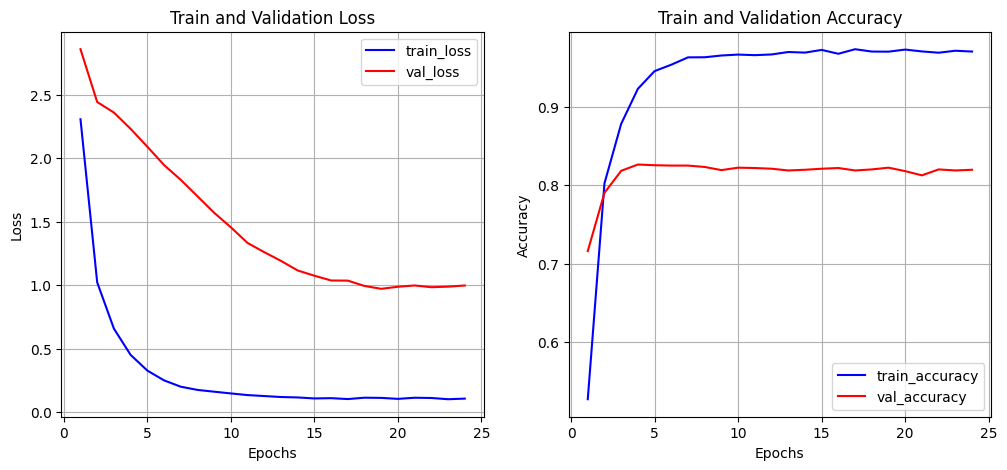

In [5]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

## 2.4. 모델 평가 및 예측

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ 테스트셋 손실 (loss): {test_loss:.4f}")
print(f"✅ 테스트셋 정확도 (accuracy): {test_acc:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 1.0178
✅ 테스트셋 손실 (loss): 1.0451
✅ 테스트셋 정확도 (accuracy): 0.7983


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# 클래스 예측
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)



71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


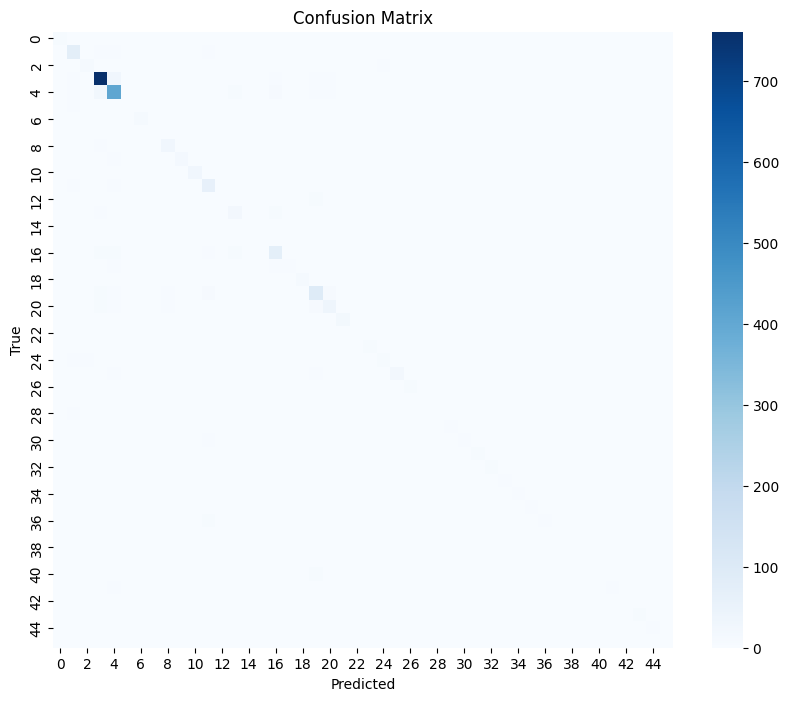

In [13]:
import seaborn as sns

# 혼동 행렬 시각화
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [14]:
# 성능 리포트 출력
print("📊 분류 성능 리포트:")
print(classification_report(true_labels, pred_labels))


📊 분류 성능 리포트:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.67      0.76      0.71       105
           2       0.65      0.65      0.65        20
           3       0.92      0.94      0.93       813
           4       0.83      0.86      0.85       474
           5       1.00      0.20      0.33         5
           6       0.76      0.93      0.84        14
           7       1.00      0.33      0.50         3
           8       0.72      0.74      0.73        38
           9       0.85      0.68      0.76        25
          10       0.79      0.90      0.84        30
          11       0.56      0.77      0.65        83
          12       0.40      0.15      0.22        13
          13       0.54      0.59      0.56        37
          14       1.00      0.50      0.67         2
          15       0.33      0.11      0.17         9
          16       0.67      0.75      0.70        99
          17  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3. CIFAR10 딥러닝 모델

## 3.1. 데이터 로드 및 전처리

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

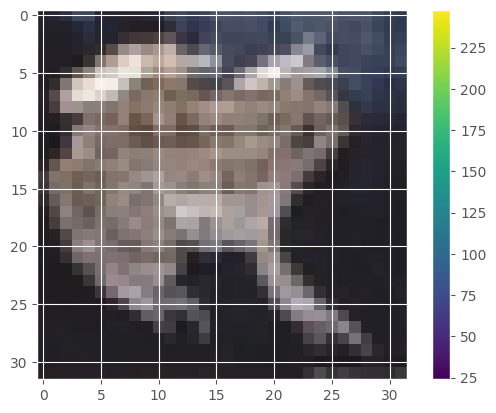

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('ggplot')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

# 각 데이터셋의 최종 형태 출력 (예: (42000, 784), (18000, 784), (10000, 784))
print(x_train.shape)  # 훈련 데이터의 형태 확인
print(x_val.shape)    # 검증 데이터의 형태 확인
print(x_test.shape)   # 테스트 데이터의 형태 확인

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 3.3. 모델 구성 및 컴파일



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

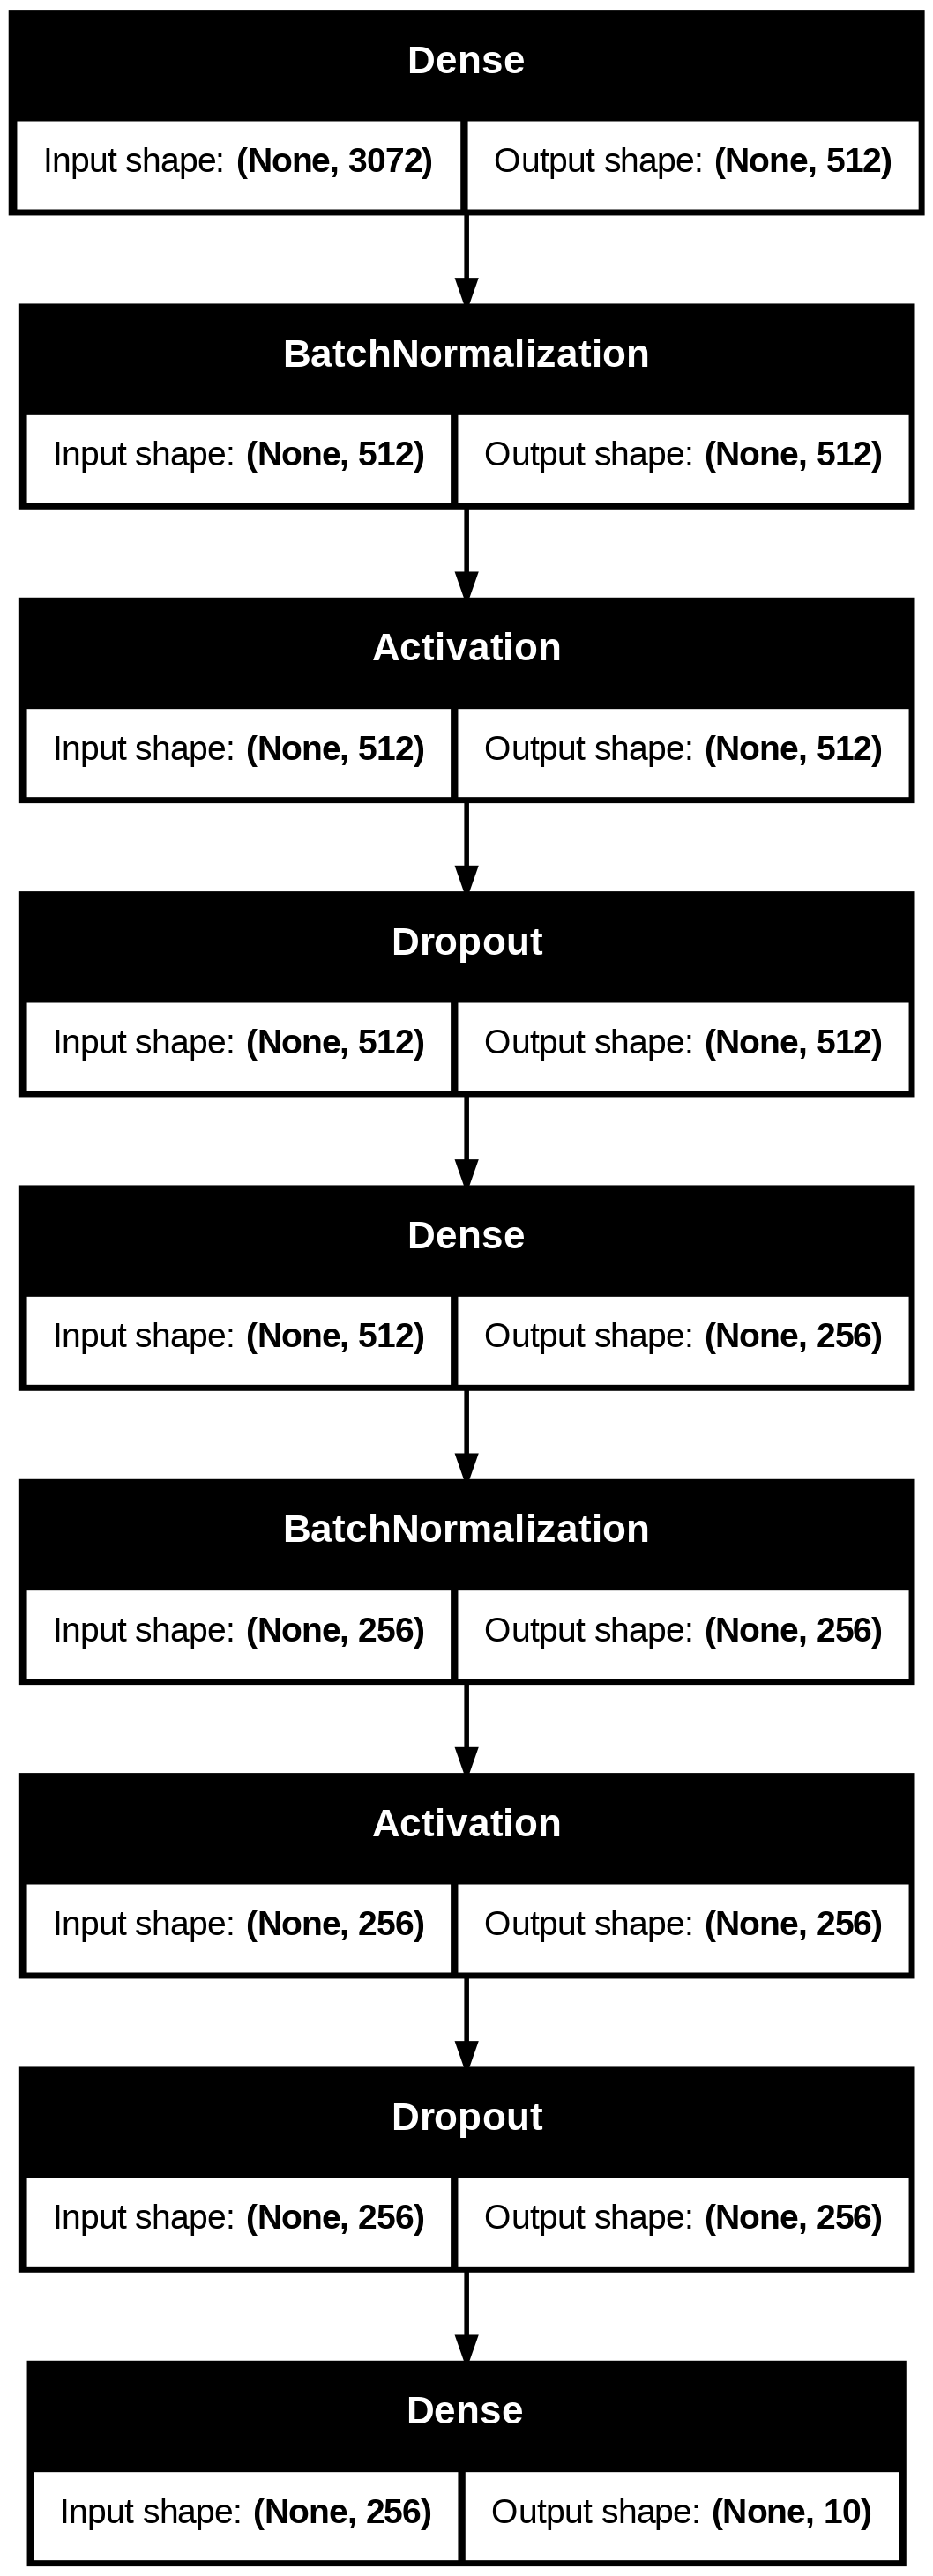

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model

# 레이블 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(3072,), name='input'))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('tanh'))  # ReLU 아님
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)



In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

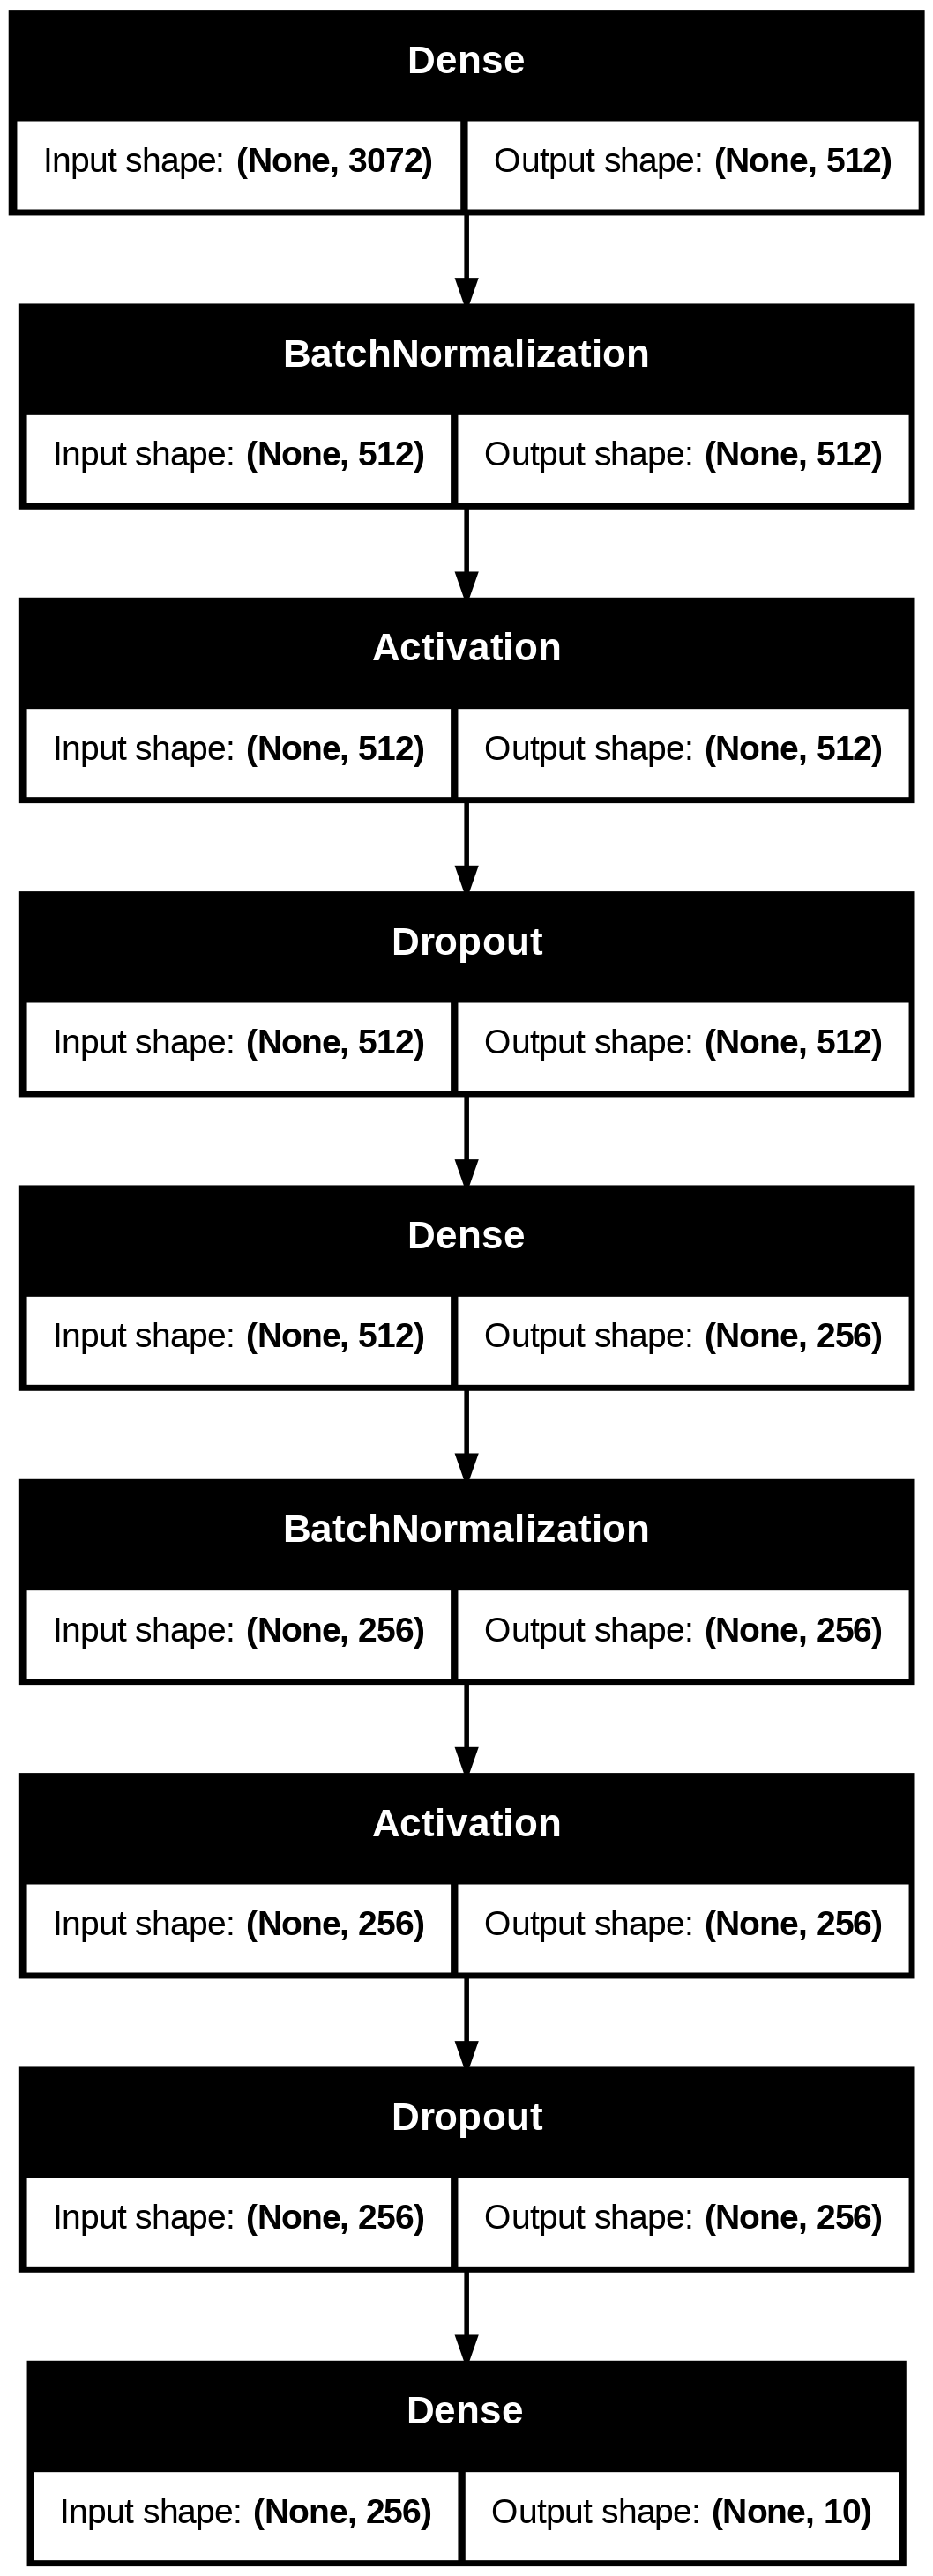

In [26]:
utils.plot_model(model, show_shapes=True)

## 3.4. 모델 학습

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 콜백 정의
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', verbose=1)
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [28]:

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2486 - loss: 2.2742
Epoch 1: val_loss improved from inf to 1.91886, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.2494 - loss: 2.2707 - val_accuracy: 0.3057 - val_loss: 1.9189
Epoch 2/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3339 - loss: 1.9255
Epoch 2: val_loss improved from 1.91886 to 1.83588, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.3340 - loss: 1.9250 - val_accuracy: 0.3606 - val_loss: 1.8359
Epoch 3/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3574 - loss: 1.8312
Epoch 3: val_loss improved from 1.83588 to 1.78129, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3576 - loss: 1.8307 - val_accuracy: 0.3901 - val_loss: 1.7813
Epoch 4/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3857 - loss: 1.7619
Epoch 4: val_loss improved from 1.78129 to 1.76219, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.3857 - loss: 1.7618 - val_accuracy: 0.3853 - val_loss: 1.7622
Epoch 5/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3981 - loss: 1.7256
Epoch 5: val_loss did not improve from 1.76219
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.3981 - loss: 1.7255 - val_accuracy: 0.3857 - val_loss: 1.7829
Epoch 6/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4067 - loss: 1.7002
Epoch 6: val_loss did not improve from 1.76219
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.4067 - loss: 1.7000 - val_accuracy: 0.3536 - val_loss: 1.8159
Epoch 7/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4144 - loss: 1.6750
Epoch 7: val_loss improved from 1.76219 to 1.71216, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.4145 - loss: 1.6749 - val_accuracy: 0.4022 - val_loss: 1.7122
Epoch 8/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4260 - loss: 1.6613
Epoch 8: val_loss did not improve from 1.71216
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4261 - loss: 1.6611 - val_accuracy: 0.4020 - val_loss: 1.7332
Epoch 9/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4274 - loss: 1.6429
Epoch 9: val_loss improved from 1.71216 to 1.64795, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4275 - loss: 1.6427 - val_accuracy: 0.4269 - val_loss: 1.6480
Epoch 10/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4365 - loss: 1.6203
Epoch 10: val_loss did not improve from 1.64795
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.4366 - loss: 1.6203 - val_accuracy: 0.4080 - val_loss: 1.7087
Epoch 11/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4455 - loss: 1.5946
Epoch 11: val_loss did not improve from 1.64795
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4454 - loss: 1.5949 - val_accuracy: 0.3969 - val_loss: 1.7083
Epoch 12/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4455 - loss: 1.5978
Epoch 12: val_loss improved from 1.64795 to 1.63678, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.4455 - loss: 1.5976 - val_accuracy: 0.4317 - val_loss: 1.6368
Epoch 13/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4525 - loss: 1.5761
Epoch 13: val_loss did not improve from 1.63678
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.4525 - loss: 1.5761 - val_accuracy: 0.4131 - val_loss: 1.6822
Epoch 14/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4539 - loss: 1.5703
Epoch 14: val_loss improved from 1.63678 to 1.63343, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4539 - loss: 1.5702 - val_accuracy: 0.4213 - val_loss: 1.6334
Epoch 15/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4585 - loss: 1.5543
Epoch 15: val_loss did not improve from 1.63343
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4585 - loss: 1.5543 - val_accuracy: 0.4239 - val_loss: 1.6339
Epoch 16/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4624 - loss: 1.5380
Epoch 16: val_loss improved from 1.63343 to 1.62626, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.4624 - loss: 1.5380 - val_accuracy: 0.4284 - val_loss: 1.6263
Epoch 17/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4635 - loss: 1.5354
Epoch 17: val_loss did not improve from 1.62626
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4635 - loss: 1.5353 - val_accuracy: 0.4062 - val_loss: 1.7082
Epoch 18/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4792 - loss: 1.5049
Epoch 18: val_loss did not improve from 1.62626
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4791 - loss: 1.5050 - val_accuracy: 0.3992 - val_loss: 1.6461
Epoch 19/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4781 - loss: 1.4923
Epoch 19: val_loss improved from 1.62626 to 1.60698, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4780 - loss: 1.4925 - val_accuracy: 0.4317 - val_loss: 1.6070
Epoch 20/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4848 - loss: 1.4691
Epoch 20: val_loss did not improve from 1.60698
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.4847 - loss: 1.4695 - val_accuracy: 0.4091 - val_loss: 1.6567
Epoch 21/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4827 - loss: 1.4784
Epoch 21: val_loss did not improve from 1.60698
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4827 - loss: 1.4784 - val_accuracy: 0.4369 - val_loss: 1.6120
Epoch 22/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4899 - loss: 1.4616
Epoch 22: val_loss improved from 1.60698 to 1.55107, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.4899 - loss: 1.4618 - val_accuracy: 0.4519 - val_loss: 1.5511
Epoch 23/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4915 - loss: 1.4618
Epoch 23: val_loss did not improve from 1.55107
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4915 - loss: 1.4618 - val_accuracy: 0.4466 - val_loss: 1.5587
Epoch 24/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4865 - loss: 1.4443
Epoch 24: val_loss did not improve from 1.55107
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4867 - loss: 1.4443 - val_accuracy: 0.4497 - val_loss: 1.5627
Epoch 25/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4951 - loss: 1.4314
Epoch 25: val_loss did not improve from 1.55107
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4952 - loss: 1.4315 - val_accuracy: 0.4506 - val_loss: 1.5541
Epoch 26/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5033 - loss: 1.4270
Epoch 26: val_loss improved from 1.55107

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.5032 - loss: 1.4271 - val_accuracy: 0.4614 - val_loss: 1.5110
Epoch 27/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5029 - loss: 1.4185
Epoch 27: val_loss did not improve from 1.51102
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5029 - loss: 1.4185 - val_accuracy: 0.4449 - val_loss: 1.5760
Epoch 28/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5045 - loss: 1.4112
Epoch 28: val_loss did not improve from 1.51102
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.5045 - loss: 1.4111 - val_accuracy: 0.4473 - val_loss: 1.5433
Epoch 29/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5069 - loss: 1.4062
Epoch 29: val_loss did not improve from 1.51102
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.5069 - loss: 1.4061 - val_accuracy: 0.4587 - val_loss: 1.5128
Epoch 30/40
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5113 - loss: 1.3861
Epoch 30: val_loss did not improve from

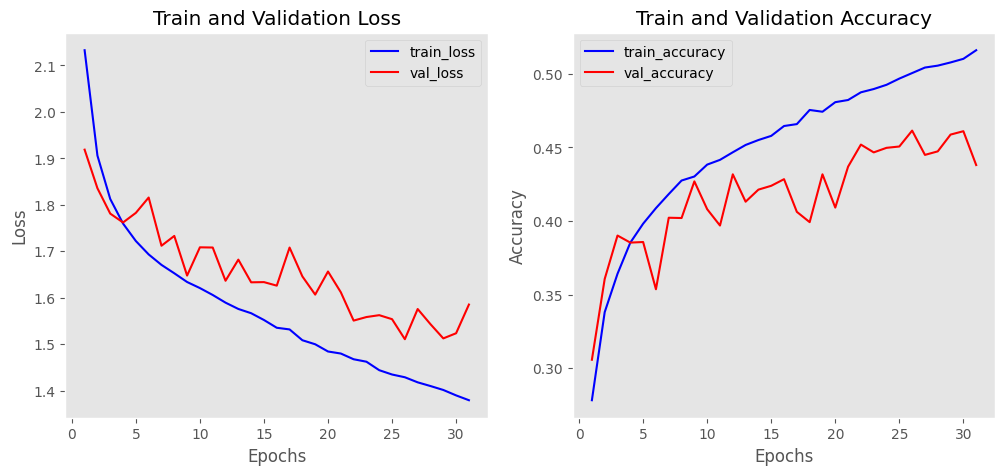

In [29]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

## 3.4. 모델 평가

In [30]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4763 - loss: 1.4962


[1.5029261112213135, 0.4731999933719635]